# LSTM 신경망

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

LSTM구조 또한 SimpleRNN 클래스와 같다

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./drive/MyDrive/개인 공부/ML_DL/data/best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 56ms/step - loss: 0.6926 - accuracy: 0.5336 - val_loss: 0.6918 - val_accuracy: 0.5600
Epoch 2/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6911 - accuracy: 0.5706 - val_loss: 0.6902 - val_accuracy: 0.5908
Epoch 3/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6887 - accuracy: 0.6018 - val_loss: 0.6872 - val_accuracy: 0.6118
Epoch 4/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6843 - accuracy: 0.6216 - val_loss: 0.6817 - val_accuracy: 0.6288
Epoch 5/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6758 - accuracy: 0.6443 - val_loss: 0.6701 - val_accuracy: 0.6552
Epoch 6/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6550 - accuracy: 0.6717 - val_loss: 0.6378 - val_accuracy: 0.6744
Epoch 7/100
313/313 [==============================] - 18s 58ms/step - loss: 0.5995 - accuracy: 0.7142 - val_loss: 0.5800 - val_ac

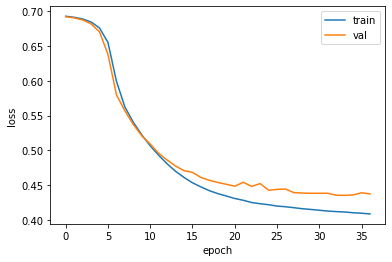

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input,maxlen=100)
# model.evaluate(test_seq,test_target)

In [ ]:
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
# 드롭아웃 적용
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./drive/MyDrive/개인 공부/ML_DL/data/best-lstm-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 56ms/step - loss: 0.6928 - accuracy: 0.5307 - val_loss: 0.6924 - val_accuracy: 0.5480
Epoch 2/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6916 - accuracy: 0.5612 - val_loss: 0.6909 - val_accuracy: 0.5954
Epoch 3/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6897 - accuracy: 0.5977 - val_loss: 0.6882 - val_accuracy: 0.6214
Epoch 4/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6850 - accuracy: 0.6335 - val_loss: 0.6807 - val_accuracy: 0.6600
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6676 - accuracy: 0.6799 - val_loss: 0.6461 - val_accuracy: 0.6988
Epoch 6/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6239 - accuracy: 0.6988 - val_loss: 0.6085 - val_accuracy: 0.7070
Epoch 7/100
313/313 [==============================] - 19s 60ms/step - loss: 0.5984 - accuracy: 0.7139 - val_loss: 0.5864 - val_ac

순환층을 연결하려면 모든 타임스탭의 은닉 상태를 전달해야하므로 마지막 순환층을 제외한 다른 앞에 존재하는 모든 순환층의 옵션으로 return_sequences 매개변수를 True로 설정한다

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation="sigmoid"))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_8 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_9 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


### GRU셀

In [19]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation="sigmoid"))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_2 (GRU)                 (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop,loss="binary_crossentropy",metrics=["accuracy"])
checkpoint_cv = keras.callbacks.ModelCheckpoint("./drive/MyDrive/개인 공부/ML_DL/data/best_gru_model.h5")
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model4.fit(train_seq,train_target,epochs=100,batch_size=64,
                   validation_data=(val_seq,val_target),
                   callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 62ms/step - loss: 0.6924 - accuracy: 0.5280 - val_loss: 0.6918 - val_accuracy: 0.5354
Epoch 2/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6902 - accuracy: 0.5688 - val_loss: 0.6891 - val_accuracy: 0.5900
Epoch 3/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6863 - accuracy: 0.6080 - val_loss: 0.6849 - val_accuracy: 0.6010
Epoch 4/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6796 - accuracy: 0.6276 - val_loss: 0.6764 - val_accuracy: 0.6206
Epoch 5/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6673 - accuracy: 0.6466 - val_loss: 0.6607 - val_accuracy: 0.6430
Epoch 6/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6434 - accuracy: 0.6689 - val_loss: 0.6293 - val_accuracy: 0.6748
Epoch 7/100
313/313 [==============================] - 19s 59ms/step - loss: 0.5873 - accuracy: 0.7046 - val_loss: 0.5510 - val_ac

In [21]:
model4.evaluate(val_seq,val_target)

157/157 [==============================] - 2s 10ms/step - loss: 0.4459 - accuracy: 0.7950


[0.4459223747253418, 0.7950000166893005]

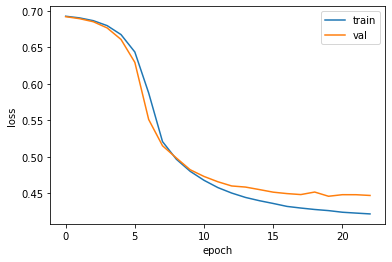

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()